# This notebook contains the comparison of oversampling, undersampling and SMOTE . It also conatins the implementation of rfecv on Rf, DT and LR models.

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score, roc_curve, auc



In [2]:
#read in the dataset
credit_card_df= pd.read_csv('creditcard.csv')
credit_card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#standardize the dataset and define the rf model

# Split dataset into features (X) and target (y)
X = credit_card_df.drop('Class', axis=1)
y = credit_card_df['Class']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#make an instance of the scaler class
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

Accuracy:  0.9761771005231558
Precision:  0.06375606375606375
Recall:  0.9387755102040817

 Classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.94      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.96      0.55     56962
weighted avg       1.00      0.98      0.99     56962

ROC-AUC: 0.9792577959011403


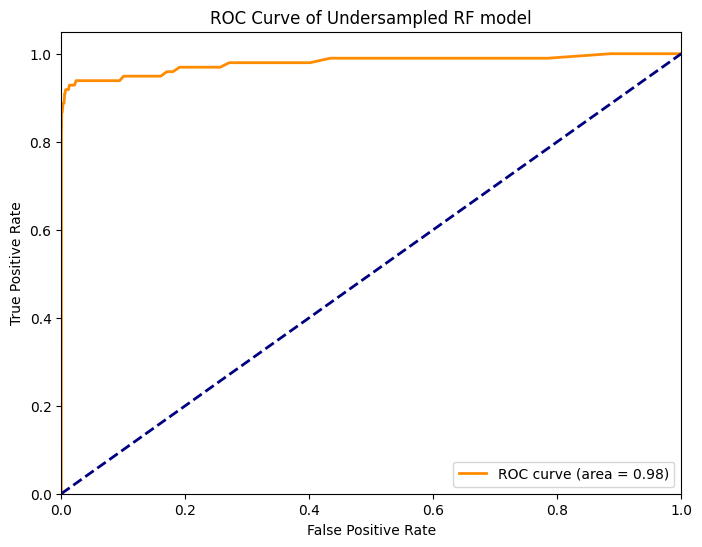

In [10]:
# Apply Undersampling
under_sampler = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = under_sampler.fit_resample(X_train_scaled, y_train)

# train the rf model
rf.fit(X_undersampled, y_undersampled)
# predict using the test set
undersampled_y_pred = rf.predict(X_test_scaled)

#evaluate the models
accuracy= accuracy_score(y_test, undersampled_y_pred)
precision=precision_score(y_test, undersampled_y_pred)
recall=recall_score(y_test, undersampled_y_pred)
classification=classification_report(y_test, undersampled_y_pred)
# Calculate ROC-AUC
undersampled_y_prob = rf.predict_proba(X_test_scaled)[:, 1]  
roc_auc = roc_auc_score(y_test, undersampled_y_prob)

# print the evaluation results
print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('\n Classification report:\n', classification)
print("ROC-AUC:", roc_auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, undersampled_y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Undersampled RF model')
plt.legend(loc='lower right')
plt.show()


Accuracy:  0.9995962220427653
Precision:  0.987012987012987
Recall:  0.7755102040816326

 Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.78      0.87        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.9525372209238225


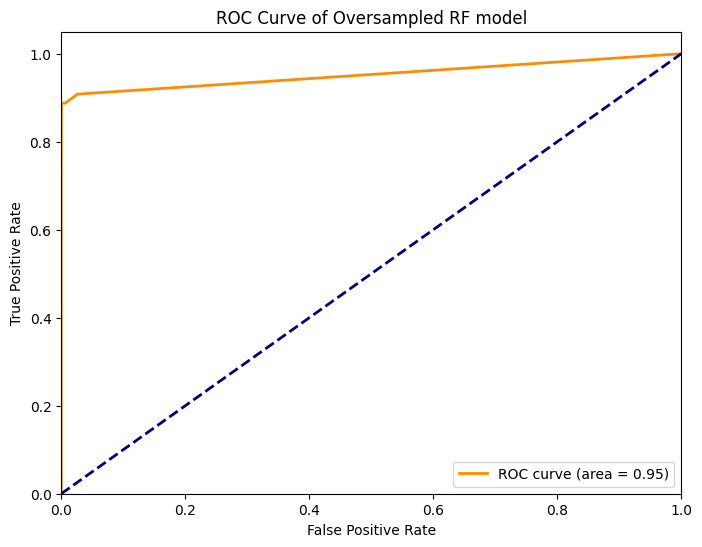

In [11]:
# Apply Oversampling
over_sampler = RandomOverSampler(random_state=42)
X_oversampled, y_oversampled = over_sampler.fit_resample(X_train_scaled, y_train)
rf.fit(X_oversampled, y_oversampled)
oversampled_y_pred = rf.predict(X_test_scaled)

#evaluate the models
accuracy= accuracy_score(y_test, oversampled_y_pred)
precision=precision_score(y_test, oversampled_y_pred)
recall=recall_score(y_test, oversampled_y_pred)
classification=classification_report(y_test, oversampled_y_pred)
# Calculate ROC-AUC
oversampled_y_prob = rf.predict_proba(X_test_scaled)[:, 1]  
roc_auc = roc_auc_score(y_test, oversampled_y_prob)

# print the evaluation results
print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('\n Classification report:\n', classification)
print("ROC-AUC:", roc_auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, oversampled_y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Oversampled RF model')
plt.legend(loc='lower right')
plt.show()

Accuracy:  0.9995962220427653
Precision:  0.9120879120879121
Recall:  0.8469387755102041

 Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.85      0.88        98

    accuracy                           1.00     56962
   macro avg       0.96      0.92      0.94     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.9911498469674871


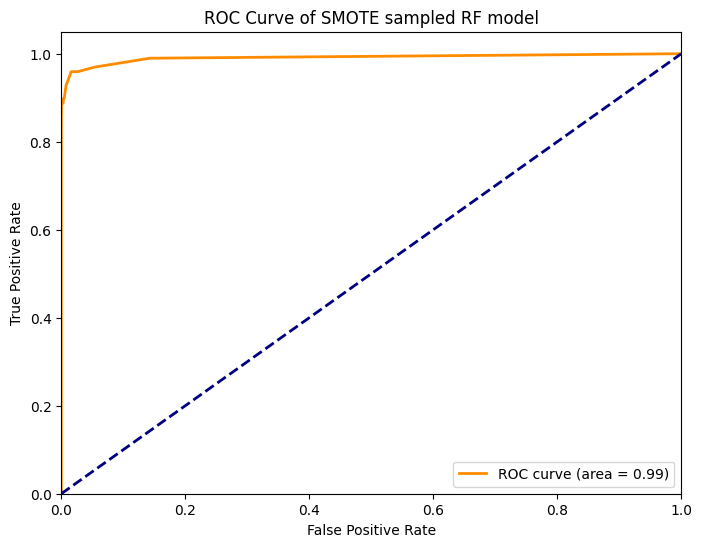

In [4]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_SMOTEsampled, y_SMOTEsampled = smote.fit_resample(X_train_scaled, y_train)


rf.fit(X_SMOTEsampled, y_SMOTEsampled)
SMOTE_y_pred = rf.predict(X_test_scaled)

#evaluate the models
accuracy= accuracy_score(y_test, SMOTE_y_pred)
precision=precision_score(y_test, SMOTE_y_pred)
recall=recall_score(y_test, SMOTE_y_pred)
classification=classification_report(y_test, SMOTE_y_pred)
# Calculate ROC-AUC
SMOTE_y_prob = rf.predict_proba(X_test_scaled)[:, 1]  
roc_auc = roc_auc_score(y_test, SMOTE_y_prob)

# print the evaluation results
print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('\n Classification report:\n', classification)
print("ROC-AUC:", roc_auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, SMOTE_y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of SMOTE sampled RF model')
plt.legend(loc='lower right')
plt.show()

## Recursive Feature Elimination with Cross-Validation

### RF

Optimal number of features : 30
Selected Feature Names: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
Accuracy: 0.9995435553526912
Precision: 0.9090909090909091
Recall: 0.8163265306122449

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.82      0.86        98

    accuracy                           1.00     56962
   macro avg       0.95      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.9617787481481056


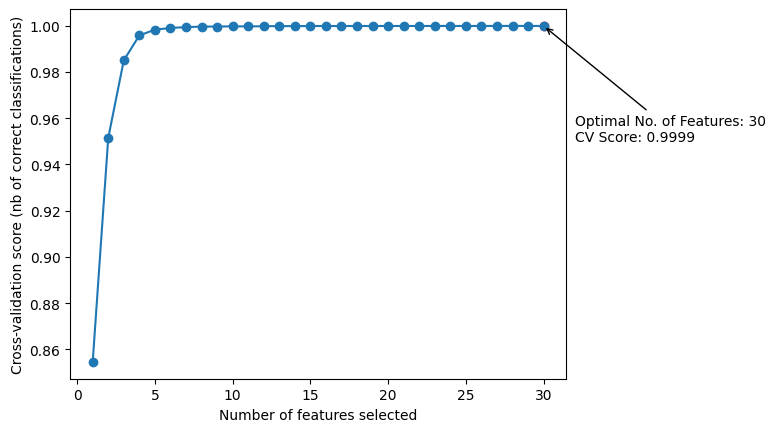

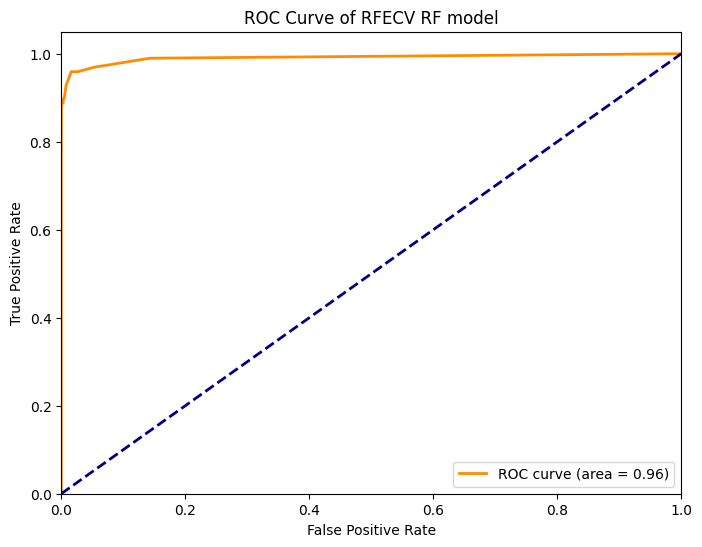

In [10]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier  
import matplotlib.pyplot as plt

# Initialize the base model for RFECV
model = RandomForestClassifier(n_estimators=20)

# Initialize StratifiedKFold for cross-validation on the training data
num_folds = 5  # Number of cross-validation folds
cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize RFECV with the base model
rfe_cv = RFECV(estimator=model, step=1, cv=cv, scoring='accuracy')

# Fit RFECV to the resampled training data
rfe_cv.fit(X_SMOTEsampled, y_SMOTEsampled)

# Print the optimal number of features
print("Optimal number of features : %d" % rfe_cv.n_features_)

# Retrieve the selected feature indices and names
selected_feature_indices = rfe_cv.support_
# Define feature names
feature_names = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
# Get the names of the selected features
selected_feature_names = [feature_names[i] for i in range(len(feature_names)) if selected_feature_indices[i]]
print("Selected Feature Names:", selected_feature_names)

# Create a new feature matrix with selected features for both training and testing data
final_X_train = X_SMOTEsampled[:, selected_feature_indices]
final_X_test = X_test_scaled[:, selected_feature_indices]

# Train your final model using the selected features and the resampled training data
final_model = RandomForestClassifier(n_estimators=20, random_state=42)
final_model.fit(final_X_train, y_SMOTEsampled)

# Make predictions on the test data
rfe_y_pred = final_model.predict(final_X_test)

# Calculate accuracy, precision, recall on the test data
accuracy = accuracy_score(y_test, rfe_y_pred)
precision = precision_score(y_test, rfe_y_pred)
recall = recall_score(y_test, rfe_y_pred)
classification = classification_report(y_test, rfe_y_pred)

# Calculate ROC-AUC
rfe_y_prob = final_model.predict_proba(final_X_test)[:, 1]  # Predict class probabilities for the positive class
roc_auc = roc_auc_score(y_test, rfe_y_prob)

# Print the evaluation results
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('\nClassification report:\n', classification)
print("ROC-AUC:", roc_auc)

# Retrieve the cross-validation scores for different number of features
cv_scores = rfe_cv.cv_results_['mean_test_score']

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (nb of correct classifications)")
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker = 'o')

# Highlighting the point with optimal number of features
optimal_features = rfe_cv.n_features_
best_score = np.max(cv_scores)
plt.scatter(optimal_features, best_score, color = 'red') # Red color to the optimal point

# Annotate the optimal number of features and best score
plt.annotate(f'Optimal No. of Features: {optimal_features}\nCV Score: {best_score:.4f}', 
             xy=(optimal_features, best_score), 
             xytext=(optimal_features+2, best_score-0.05), # to slightly offset the text for better readability
             arrowprops=dict(facecolor='black', arrowstyle='->', connectionstyle='arc3'))


# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of RFECV RF model')
plt.legend(loc='lower right')
plt.show()


Optimal number of features : 29
Selected Feature Names: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V25', 'V26', 'V27', 'V28', 'Amount']
Accuracy: 0.9995611109160493
Precision: 0.9010989010989011
Recall: 0.8367346938775511

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.84      0.87        98

    accuracy                           1.00     56962
   macro avg       0.95      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.9664802629690031


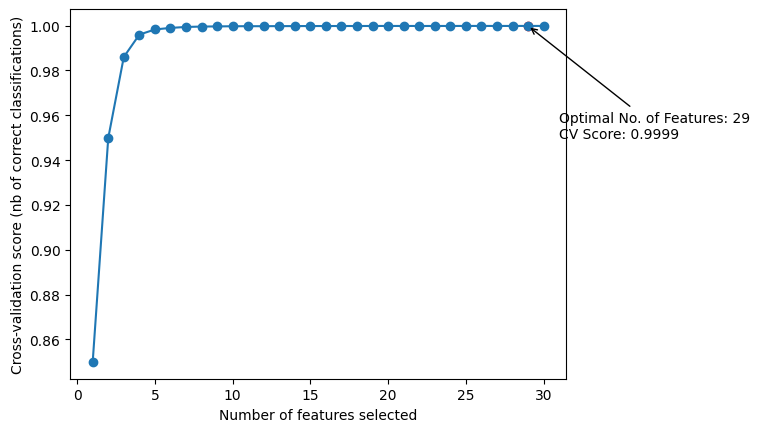

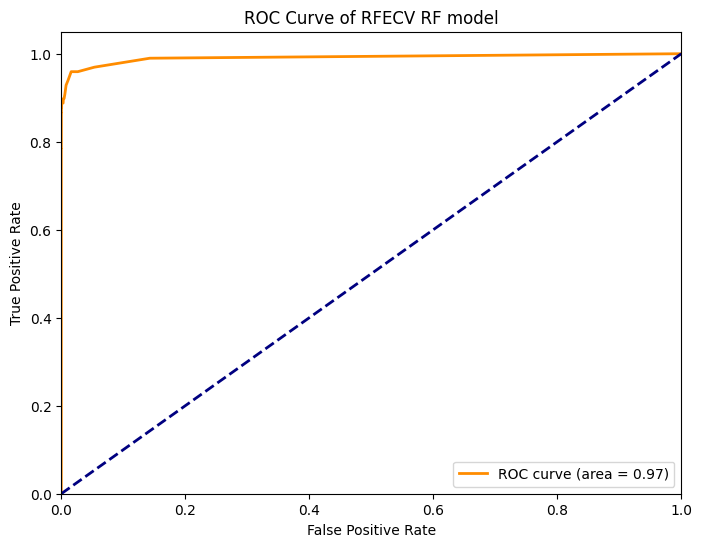

In [11]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier  
import matplotlib.pyplot as plt

# Initialize the base model for RFECV
model = RandomForestClassifier(n_estimators=30)

# Initialize StratifiedKFold for cross-validation on the training data
num_folds = 5  # Number of cross-validation folds
cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize RFECV with the base model
rfe_cv = RFECV(estimator=model, step=1, cv=cv, scoring='accuracy')

# Fit RFECV to the resampled training data
rfe_cv.fit(X_SMOTEsampled, y_SMOTEsampled)

# Print the optimal number of features
print("Optimal number of features : %d" % rfe_cv.n_features_)

# Retrieve the selected feature indices and names
selected_feature_indices = rfe_cv.support_
# Define feature names
feature_names = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
# Get the names of the selected features
selected_feature_names = [feature_names[i] for i in range(len(feature_names)) if selected_feature_indices[i]]
print("Selected Feature Names:", selected_feature_names)

# Create a new feature matrix with selected features for both training and testing data
final_X_train = X_SMOTEsampled[:, selected_feature_indices]
final_X_test = X_test_scaled[:, selected_feature_indices]

# Train your final model using the selected features and the resampled training data
final_model = RandomForestClassifier(n_estimators=30, random_state=42)
final_model.fit(final_X_train, y_SMOTEsampled)

# Make predictions on the test data
rfe_y_pred = final_model.predict(final_X_test)

# Calculate accuracy, precision, recall on the test data
accuracy = accuracy_score(y_test, rfe_y_pred)
precision = precision_score(y_test, rfe_y_pred)
recall = recall_score(y_test, rfe_y_pred)
classification = classification_report(y_test, rfe_y_pred)

# Calculate ROC-AUC
rfe_y_prob = final_model.predict_proba(final_X_test)[:, 1]  # Predict class probabilities for the positive class
roc_auc = roc_auc_score(y_test, rfe_y_prob)

# Print the evaluation results
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('\nClassification report:\n', classification)
print("ROC-AUC:", roc_auc)

# Retrieve the cross-validation scores for different number of features
cv_scores = rfe_cv.cv_results_['mean_test_score']

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (nb of correct classifications)")
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker = 'o')

# Highlighting the point with optimal number of features
optimal_features = rfe_cv.n_features_
best_score = np.max(cv_scores)
plt.scatter(optimal_features, best_score, color = 'red') # Red color to the optimal point

# Annotate the optimal number of features and best score
plt.annotate(f'Optimal No. of Features: {optimal_features}\nCV Score: {best_score:.4f}', 
             xy=(optimal_features, best_score), 
             xytext=(optimal_features+2, best_score-0.05), # to slightly offset the text for better readability
             arrowprops=dict(facecolor='black', arrowstyle='->', connectionstyle='arc3'))


# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of RFECV RF model')
plt.legend(loc='lower right')
plt.show()


Optimal number of features : 29
Selected Feature Names: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
Accuracy: 0.9995259997893332
Precision: 0.898876404494382
Recall: 0.8163265306122449

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.82      0.86        98

    accuracy                           1.00     56962
   macro avg       0.95      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.9668376319295304


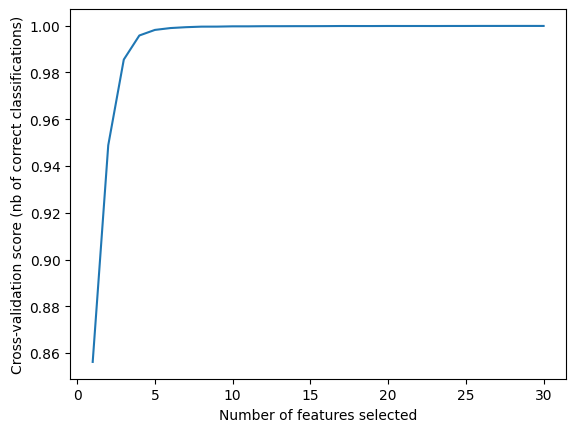

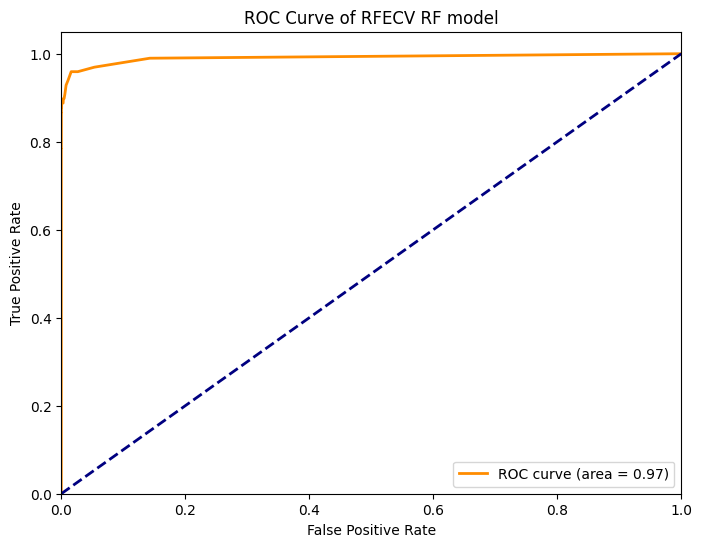

In [15]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier  # Example classifier
import matplotlib.pyplot as plt

# Initialize the base model for RFECV
model = RandomForestClassifier(n_estimators=20)

# Initialize StratifiedKFold for cross-validation on the training data
num_folds = 5  # Number of cross-validation folds
cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize RFECV with the base model
rfe_cv = RFECV(estimator=model, step=1, cv=cv, scoring='accuracy')

# Fit RFECV to the resampled training data
rfe_cv.fit(X_SMOTEsampled, y_SMOTEsampled)

# Print the optimal number of features
print("Optimal number of features : %d" % rfe_cv.n_features_)

# Retrieve the selected feature indices and names
selected_feature_indices = rfe_cv.support_
# Define feature names
feature_names = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
# Get the names of the selected features
selected_feature_names = [feature_names[i] for i in range(len(feature_names)) if selected_feature_indices[i]]
print("Selected Feature Names:", selected_feature_names)

# Create a new feature matrix with selected features for both training and testing data
final_X_train = X_SMOTEsampled[:, selected_feature_indices]
final_X_test = X_test_scaled[:, selected_feature_indices]

# Train your final model using the selected features and the resampled training data
final_model = RandomForestClassifier(n_estimators=20, random_state=42)
final_model.fit(final_X_train, y_SMOTEsampled)

# Make predictions on the test data
rfe_y_pred = final_model.predict(final_X_test)

# Calculate accuracy, precision, recall on the test data
accuracy = accuracy_score(y_test, rfe_y_pred)
precision = precision_score(y_test, rfe_y_pred)
recall = recall_score(y_test, rfe_y_pred)
classification = classification_report(y_test, rfe_y_pred)

# Calculate ROC-AUC
rfe_y_prob = final_model.predict_proba(final_X_test)[:, 1]  # Predict class probabilities for the positive class
roc_auc = roc_auc_score(y_test, rfe_y_prob)

# Print the evaluation results
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('\nClassification report:\n', classification)
print("ROC-AUC:", roc_auc)

# Retrieve the cross-validation scores for different number of features
cv_scores = rfe_cv.cv_results_['mean_test_score']

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (nb of correct classifications)")
plt.plot(range(1, len(cv_scores) + 1), cv_scores)
plt.show()

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of RFECV RF model')
plt.legend(loc='lower right')
plt.show()


Optimal number of features : 30
Selected Feature Names: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
Accuracy: 0.9995259997893332
Precision: 0.898876404494382
Recall: 0.8163265306122449

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.82      0.86        98

    accuracy                           1.00     56962
   macro avg       0.95      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.9872688541511145


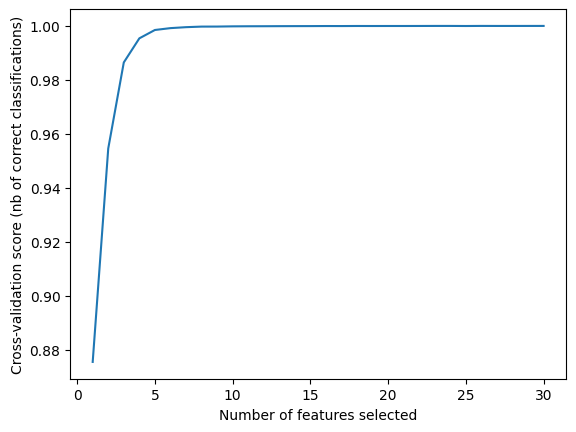

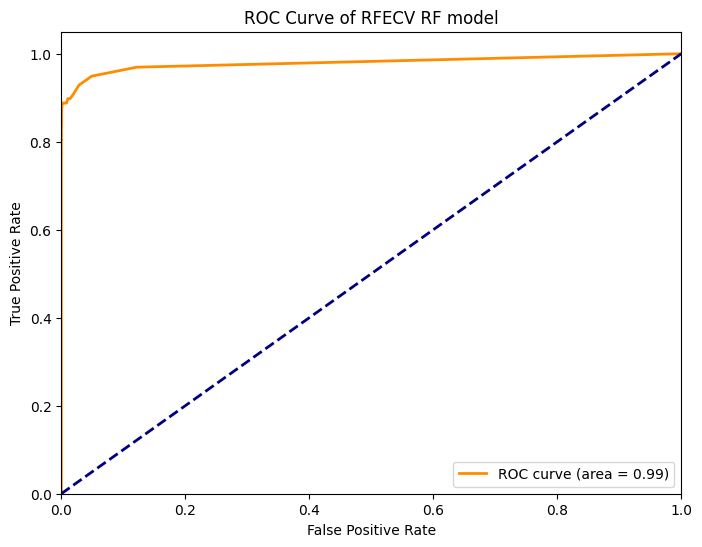

In [10]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier  # Example classifier
import matplotlib.pyplot as plt

# Initialize the base model for RFECV
model = RandomForestClassifier(n_estimators=50)

# Initialize StratifiedKFold for cross-validation on the training data
num_folds = 5  # Number of cross-validation folds
cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize RFECV with the base model
rfe_cv = RFECV(estimator=model, step=1, cv=cv, scoring='accuracy')

# Fit RFECV to the resampled training data
rfe_cv.fit(X_SMOTEsampled, y_SMOTEsampled)

# Print the optimal number of features
print("Optimal number of features : %d" % rfe_cv.n_features_)

# Retrieve the selected feature indices and names
selected_feature_indices = rfe_cv.support_
# Define feature names
feature_names = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
# Get the names of the selected features
selected_feature_names = [feature_names[i] for i in range(len(feature_names)) if selected_feature_indices[i]]
print("Selected Feature Names:", selected_feature_names)

# Create a new feature matrix with selected features for both training and testing data
final_X_train = X_SMOTEsampled[:, selected_feature_indices]
final_X_test = X_test_scaled[:, selected_feature_indices]

# Train your final model using the selected features and the resampled training data
final_model = RandomForestClassifier(n_estimators=50, random_state=42)
final_model.fit(final_X_train, y_SMOTEsampled)

# Make predictions on the test data
rfe_y_pred = final_model.predict(final_X_test)

# Calculate accuracy, precision, recall on the test data
accuracy = accuracy_score(y_test, rfe_y_pred)
precision = precision_score(y_test, rfe_y_pred)
recall = recall_score(y_test, rfe_y_pred)
classification = classification_report(y_test, rfe_y_pred)

# Calculate ROC-AUC
rfe_y_prob = final_model.predict_proba(final_X_test)[:, 1]  # Predict class probabilities for the positive class
roc_auc = roc_auc_score(y_test, rfe_y_prob)

# Print the evaluation results
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('\nClassification report:\n', classification)
print("ROC-AUC:", roc_auc)

# Retrieve the cross-validation scores for different number of features
cv_scores = rfe_cv.cv_results_['mean_test_score']

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (nb of correct classifications)")
plt.plot(range(1, len(cv_scores) + 1), cv_scores)
plt.show()

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of RFECV RF model')
plt.legend(loc='lower right')
plt.show()


Optimal number of features : 24
Selected Feature Names: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V26', 'V27', 'Amount']
Accuracy: 0.9995435553526912
Precision: 0.8913043478260869
Recall: 0.8367346938775511

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.89      0.84      0.86        98

    accuracy                           1.00     56962
   macro avg       0.95      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.9859709130557119


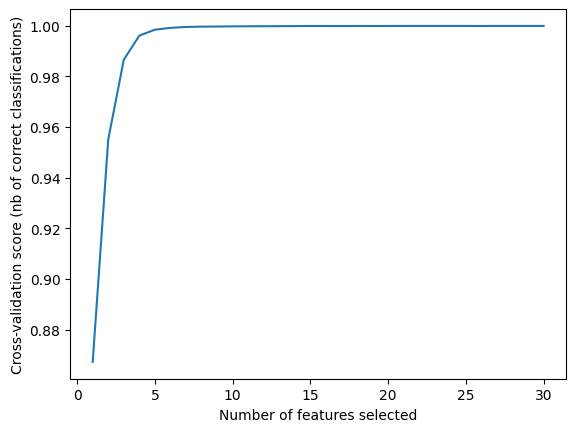

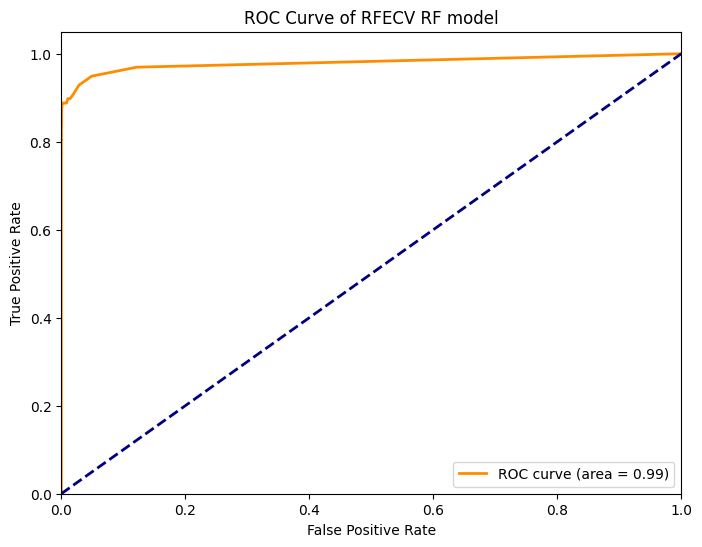

In [11]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier  # Example classifier
import matplotlib.pyplot as plt

# Initialize the base model for RFECV
model = RandomForestClassifier(n_estimators=100)

# Initialize StratifiedKFold for cross-validation on the training data
num_folds = 5  # Number of cross-validation folds
cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize RFECV with the base model
rfe_cv = RFECV(estimator=model, step=1, cv=cv, scoring='accuracy')

# Fit RFECV to the resampled training data
rfe_cv.fit(X_SMOTEsampled, y_SMOTEsampled)

# Print the optimal number of features
print("Optimal number of features : %d" % rfe_cv.n_features_)

# Retrieve the selected feature indices and names
selected_feature_indices = rfe_cv.support_
# Define feature names
feature_names = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
# Get the names of the selected features
selected_feature_names = [feature_names[i] for i in range(len(feature_names)) if selected_feature_indices[i]]
print("Selected Feature Names:", selected_feature_names)

# Create a new feature matrix with selected features for both training and testing data
final_X_train = X_SMOTEsampled[:, selected_feature_indices]
final_X_test = X_test_scaled[:, selected_feature_indices]

# Train your final model using the selected features and the resampled training data
final_model = RandomForestClassifier(n_estimators=100, random_state=42)
final_model.fit(final_X_train, y_SMOTEsampled)

# Make predictions on the test data
rfe_y_pred = final_model.predict(final_X_test)

# Calculate accuracy, precision, recall on the test data
accuracy = accuracy_score(y_test, rfe_y_pred)
precision = precision_score(y_test, rfe_y_pred)
recall = recall_score(y_test, rfe_y_pred)
classification = classification_report(y_test, rfe_y_pred)

# Calculate ROC-AUC
rfe_y_prob = final_model.predict_proba(final_X_test)[:, 1]  # Predict class probabilities for the positive class
roc_auc = roc_auc_score(y_test, rfe_y_prob)

# Print the evaluation results
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('\nClassification report:\n', classification)
print("ROC-AUC:", roc_auc)

# Retrieve the cross-validation scores for different number of features
cv_scores = rfe_cv.cv_results_['mean_test_score']

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (nb of correct classifications)")
plt.plot(range(1, len(cv_scores) + 1), cv_scores)
plt.show()

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of RFECV RF model')
plt.legend(loc='lower right')
plt.show()


### LR

Optimal number of features : 30
Selected Feature Names: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
Accuracy: 0.9745970998209332
Precision: 0.058862001308044476
Recall: 0.9183673469387755

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

ROC-AUC: 0.9785619896523606


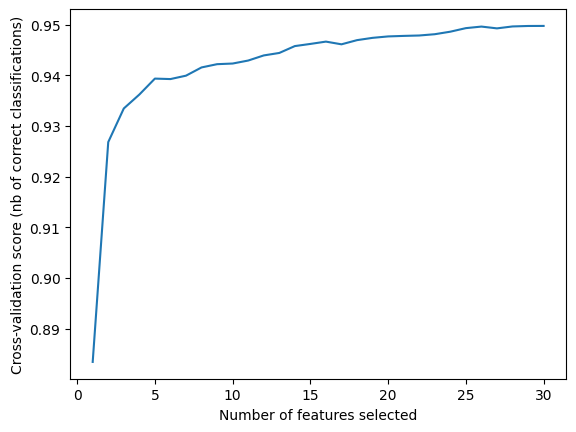

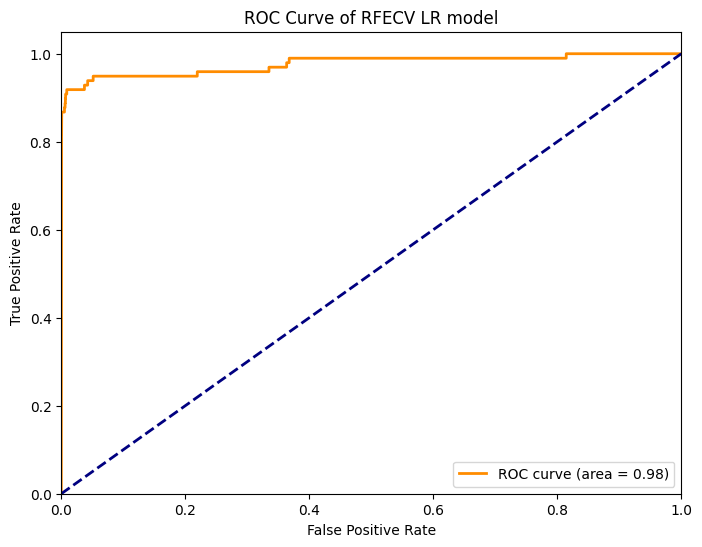

In [14]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Initialize the base model for RFE with Logistic Regression
model = LogisticRegression(random_state=42)

# Initialize StratifiedKFold for cross-validation on the training data
num_folds = 5  # Number of cross-validation folds
cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize RFECV with the base model
rfe_cv = RFECV(estimator=model, step=1, cv=cv, scoring='accuracy')

# Fit RFECV to the resampled training data
rfe_cv.fit(X_SMOTEsampled, y_SMOTEsampled)

# Print the optimal number of features
print("Optimal number of features : %d" % rfe_cv.n_features_)

# Retrieve the selected feature indices and names
selected_feature_indices = rfe_cv.support_
# Define feature names
feature_names = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
# Get the names of the selected features
selected_feature_names = [feature_names[i] for i in range(len(feature_names)) if selected_feature_indices[i]]
print("Selected Feature Names:", selected_feature_names)

# Create a new feature matrix with selected features for both training and testing data
final_X_train = X_SMOTEsampled[:, selected_feature_indices]
final_X_test = X_test_scaled[:, selected_feature_indices]

# Train your final model using the selected features and the resampled training data
final_model = LogisticRegression(random_state=42)
final_model.fit(final_X_train, y_SMOTEsampled)

# Make predictions on the test data
rfe_y_pred = final_model.predict(final_X_test)

# Calculate accuracy, precision, recall on the test data
accuracy = accuracy_score(y_test, rfe_y_pred)
precision = precision_score(y_test, rfe_y_pred)
recall = recall_score(y_test, rfe_y_pred)
classification = classification_report(y_test, rfe_y_pred)

# Calculate ROC-AUC
rfe_y_prob = final_model.predict_proba(final_X_test)[:, 1]  # Predict class probabilities for the positive class
roc_auc = roc_auc_score(y_test, rfe_y_prob)

# Print the evaluation results
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('\nClassification report:\n', classification)
print("ROC-AUC:", roc_auc)

# Retrieve the cross-validation scores for different number of features
cv_scores = rfe_cv.cv_results_['mean_test_score']

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (nb of correct classifications)")
plt.plot(range(1, len(cv_scores) + 1), cv_scores)
plt.show()

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of RFECV LR model')
plt.legend(loc='lower right')
plt.show()


### DT

Optimal number of features : 30
Selected Feature Names: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
Accuracy: 0.9976124433833081
Precision: 0.39893617021276595
Recall: 0.7653061224489796

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.40      0.77      0.52        98

    accuracy                           1.00     56962
   macro avg       0.70      0.88      0.76     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.8816594624625314


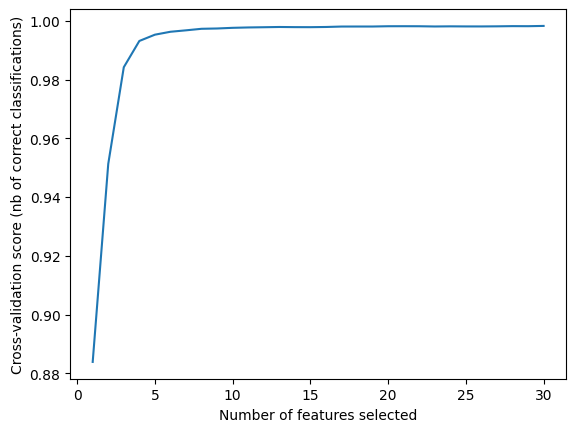

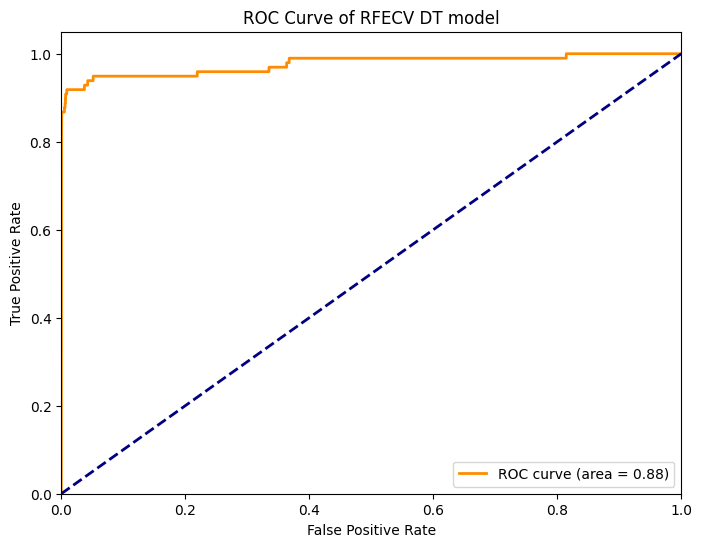

In [15]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Initialize the base model for RFE with Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

# Initialize StratifiedKFold for cross-validation on the training data
num_folds = 5  # Number of cross-validation folds
cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize RFECV with the base model
rfe_cv = RFECV(estimator=model, step=1, cv=cv, scoring='accuracy')

# Fit RFECV to the resampled training data
rfe_cv.fit(X_SMOTEsampled, y_SMOTEsampled)

# Print the optimal number of features
print("Optimal number of features : %d" % rfe_cv.n_features_)

# Retrieve the selected feature indices and names
selected_feature_indices = rfe_cv.support_
# Define feature names
feature_names = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
# Get the names of the selected features
selected_feature_names = [feature_names[i] for i in range(len(feature_names)) if selected_feature_indices[i]]
print("Selected Feature Names:", selected_feature_names)

# Create a new feature matrix with selected features for both training and testing data
final_X_train = X_SMOTEsampled[:, selected_feature_indices]
final_X_test = X_test_scaled[:, selected_feature_indices]

# Train your final model using the selected features and the resampled training data
final_model = DecisionTreeClassifier(random_state=42)
final_model.fit(final_X_train, y_SMOTEsampled)

# Make predictions on the test data
rfe_y_pred = final_model.predict(final_X_test)

# Calculate accuracy, precision, recall on the test data
accuracy = accuracy_score(y_test, rfe_y_pred)
precision = precision_score(y_test, rfe_y_pred)
recall = recall_score(y_test, rfe_y_pred)
classification = classification_report(y_test, rfe_y_pred)

# Calculate ROC-AUC
rfe_y_prob = final_model.predict_proba(final_X_test)[:, 1]  # Predict class probabilities for the positive class
roc_auc = roc_auc_score(y_test, rfe_y_prob)

# Print the evaluation results
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('\nClassification report:\n', classification)
print("ROC-AUC:", roc_auc)

# Retrieve the cross-validation scores for different number of features
cv_scores = rfe_cv.cv_results_['mean_test_score']

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (nb of correct classifications)")
plt.plot(range(1, len(cv_scores) + 1), cv_scores)
plt.show()

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of RFECV DT model')
plt.legend(loc='lower right')
plt.show()


Optimal number of features : 30
Selected Feature Names: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
Accuracy: 0.9745970998209332
Precision: 0.058862001308044476
Recall: 0.9183673469387755

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

ROC-AUC: 0.9785619896523606


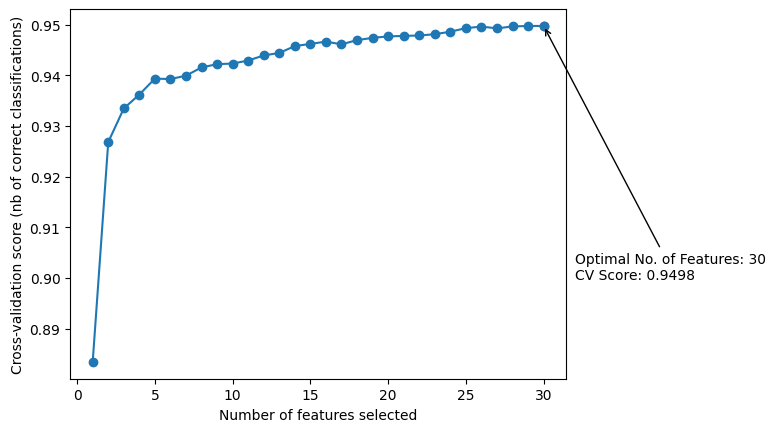

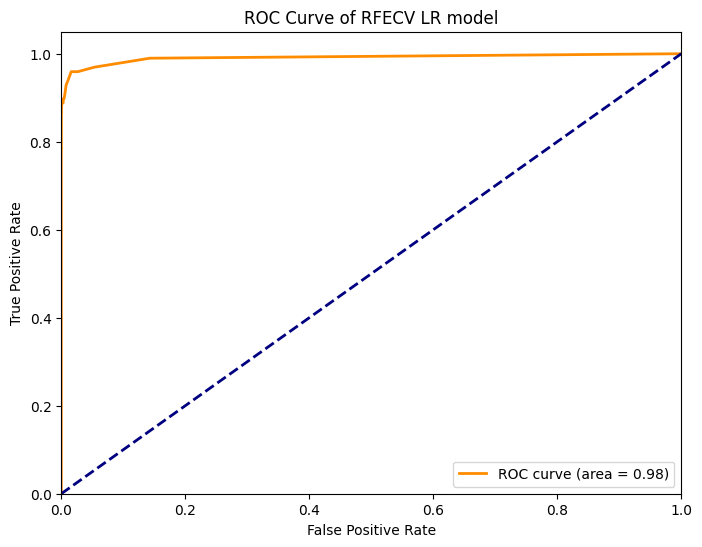

In [8]:
### LR

from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Initialize the base model for RFE with Logistic Regression
model = LogisticRegression(random_state=42)

# Initialize StratifiedKFold for cross-validation on the training data
num_folds = 5  # Number of cross-validation folds
cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize RFECV with the base model
rfe_cv = RFECV(estimator=model, step=1, cv=cv, scoring='accuracy')

# Fit RFECV to the resampled training data
rfe_cv.fit(X_SMOTEsampled, y_SMOTEsampled)

# Print the optimal number of features
print("Optimal number of features : %d" % rfe_cv.n_features_)

# Retrieve the selected feature indices and names
selected_feature_indices = rfe_cv.support_
# Define feature names
feature_names = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
# Get the names of the selected features
selected_feature_names = [feature_names[i] for i in range(len(feature_names)) if selected_feature_indices[i]]
print("Selected Feature Names:", selected_feature_names)

# Create a new feature matrix with selected features for both training and testing data
final_X_train = X_SMOTEsampled[:, selected_feature_indices]
final_X_test = X_test_scaled[:, selected_feature_indices]

# Train your final model using the selected features and the resampled training data
final_model = LogisticRegression(random_state=42)
final_model.fit(final_X_train, y_SMOTEsampled)

# Make predictions on the test data
rfe_y_pred = final_model.predict(final_X_test)

# Calculate accuracy, precision, recall on the test data
accuracy = accuracy_score(y_test, rfe_y_pred)
precision = precision_score(y_test, rfe_y_pred)
recall = recall_score(y_test, rfe_y_pred)
classification = classification_report(y_test, rfe_y_pred)

# Calculate ROC-AUC
rfe_y_prob = final_model.predict_proba(final_X_test)[:, 1]  # Predict class probabilities for the positive class
roc_auc = roc_auc_score(y_test, rfe_y_prob)

# Print the evaluation results
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('\nClassification report:\n', classification)
print("ROC-AUC:", roc_auc)

# Retrieve the cross-validation scores for different number of features
cv_scores = rfe_cv.cv_results_['mean_test_score']

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (nb of correct classifications)")
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker = 'o')

# Highlighting the point with optimal number of features
optimal_features = rfe_cv.n_features_
best_score = np.max(cv_scores)
plt.scatter(optimal_features, best_score, color = 'red') # Red color to the optimal point

# Annotate the optimal number of features and best score
plt.annotate(f'Optimal No. of Features: {optimal_features}\nCV Score: {best_score:.4f}', 
             xy=(optimal_features, best_score), 
             xytext=(optimal_features+2, best_score-0.05), # to slightly offset the text for better readability
             arrowprops=dict(facecolor='black', arrowstyle='->', connectionstyle='arc3'))

plt.show()

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of RFECV LR model')
plt.legend(loc='lower right')
plt.show()


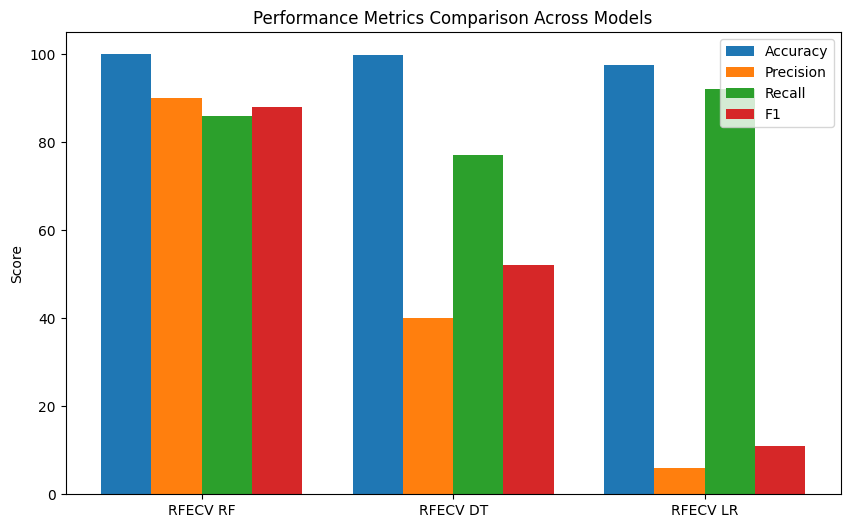

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data for the models and their performance metrics
data = {
    'Model': ['RFECV RF', 'RFECV DT', 'RFECV LR'],
    'Accuracy': [99.96, 99.76, 97.46],
    'Precision': [90.0, 40.0, 6.0],
    'Recall': [86.0, 77.0, 92.0],
    'F1': [88.0, 52.0, 11.0]
}

# Convert data to a DataFrame
df = pd.DataFrame(data)

# positions for the bars
positions = np.arange(len(df['Model']))

# bar width
bar_width = 0.2

# Plot the bars for each metric
fig, ax = plt.subplots(figsize=(10, 6))

# Create bars for each performance metric
for i, metric in enumerate(['Accuracy', 'Precision', 'Recall', 'F1']):
    ax.bar(positions + i * bar_width, df[metric], bar_width, label=metric)

# Set the x-axis labels, the title, and the y-axis label
ax.set_xticks(positions + bar_width * 1.5)
ax.set_xticklabels(df['Model'])
ax.set_ylabel('Score')
ax.set_title('Performance Metrics Comparison Across Models')

# Add a legend
ax.legend()

# Show the plot
plt.show()
